## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [ ]:
X.isnull().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

Пропущенных значений нет

Категориальные признаки в наборе отсутствуют

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.seed(5))
X_train.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
102,12.34,2.45,2.46,21.0,98.0,2.56,2.11,0.34,1.31,2.80,0.80,3.38,438.0


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
normalizer = StandardScaler()
model_columns = ['alcohol', 'magnesium']

# X_train normalization
X_train_transformed = normalizer.fit_transform(X_train[model_columns])

# X_test normalization
X_test_transformed = normalizer.transform(X_test[model_columns])

In [ ]:
n_neighbors = [1, 3, 5, 10, 15, 25]

In [ ]:
from sklearn.metrics import accuracy_score

print("NN\tTrain\tTest")
print('-' * 21)

# list of models with different number of neighbors
KNN_models = []

for num in n_neighbors:
    print(num, end='\t')

    # model learning and making predictions
    classifier = KNeighborsClassifier(n_neighbors=num)
    classifier.fit(X_train_transformed, y_train)

    KNN_models.append(classifier)

    # evaluating accuracy
    for X_data, y_data in zip([X_train_transformed, X_test_transformed], [y_train, y_test]):
        y_predicted = classifier.predict(X_data)
        print(f"{accuracy_score(y_predicted, y_data):.2f}", end='\t')

    print()

NN	Train	Test
---------------------
1	0.99	0.72	
3	0.85	0.72	
5	0.82	0.70	
10	0.78	0.78	
15	0.76	0.69	
25	0.74	0.70	


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend==0.18.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.1 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

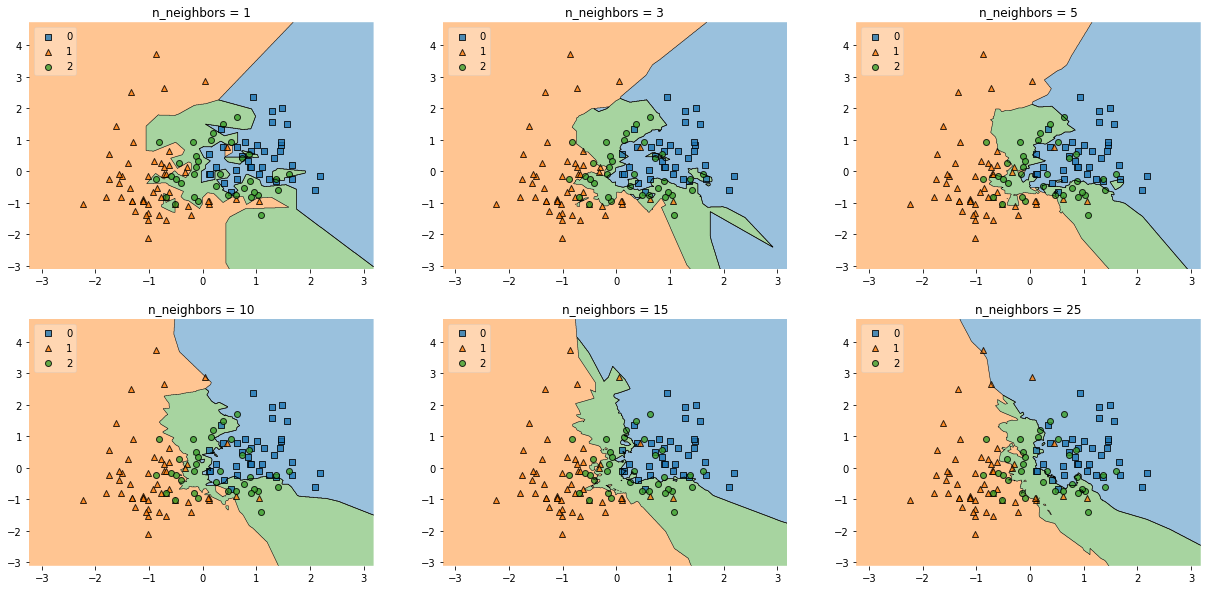

In [ ]:
from sklearn import neighbors
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools


gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(21, 10))

labels = ['n_neighbors = ' + str(num) for num in n_neighbors]

for clf, lab, grd in zip(KNN_models,
                         labels,
                         itertools.product(range(3), repeat=2)):

    clf.fit(X_train_transformed, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_transformed, y=y_train, clf=clf, legend=2)

    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

# Анализ полученных данных




*  **N = 1**

    Очевидно, что при данном значении наступает переобучение модели. Числовые показатели погрешности задания 1.3 на обучающей выборке близки к 1, то есть модель "заучивает" данные. График задания 1.5 доказывает, что модель чересчур подстраивается под ответы.

*   **N = 3**
   
    Данное значение параметра также слишком чувствительно к выбросам. Несмотря на то что числовые показатели погрешности задания 1.3 на обучающей выборке упали по сравнению с предыдущим N, они все еще велики. Чувствительность к выбросам ярко заметна на графике задания 1.5.

*   **N = 5**

    Данное значение параметра все еще не подходит по своим показателям. Хотя погрешность задания 1.3 на обучающей выборке падает по сравнению с предыдущими N, она также незначительно упала и на тестовой выборке. Чувствительность к выбросам малозаметна на графике задания 1.5 и становится похожа на правду.
*   **N = 10**

    Оптимальное число соседей. Погрешность задания 1.3 на обучающей выборке сократилась, а на тестовой выборке увеличилась и достигла пика в размере 0,78. График задания 1.5 плавный, адекватно классифицирующий объекты и допустимо игнорирующий выбросы.
*   **N = 15** и **N = 25**

    Показатели задания 1.3 на тестовой выборке заметно проседают по сравнению с N = 10. На график задания 1.5 заметна деформация зеленой области и потеря точности ответа на объектах 2 класса

**Ответ: N = 10**





### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

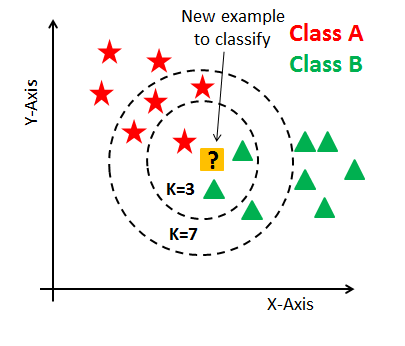

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k
        self.X = []
        self.y = []

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        distances = np.vstack((np.linalg.norm((X[:, None] - self.X), axis=2), self.y)).T
        min_distance_idexes = np.argpartition(distances[:, :-1], self.k, axis=0)
        res = distances[min_distance_idexes][:self.k][:, :, -1].T

        return np.round(np.mean(res, axis=1)).astype(np.int64)

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
!wget https://raw.githubusercontent.com/Grigoreva2003/hse_iad_2023/main/diamonds.csv

--2023-03-22 18:49:45--  https://raw.githubusercontent.com/Grigoreva2003/hse_iad_2023/main/diamonds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3192560 (3.0M) [text/plain]
Saving to: ‘diamonds.csv’

diamonds.csv        100%[===================>]   3.04M  --.-KB/s    in 0.07s   

2023-03-22 18:49:46 (44.1 MB/s) - ‘diamonds.csv’ saved [3192560/3192560]



In [ ]:
data = pd.read_csv('diamonds.csv')
print(f"Data shape: {data.shape}")
data.head()

Data shape: (53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [ ]:
data.isnull().any()

Unnamed: 0    False
carat         False
cut           False
color         False
clarity       False
depth         False
table         False
price         False
x             False
y             False
z             False
dtype: bool

Пропущенных значений нет

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

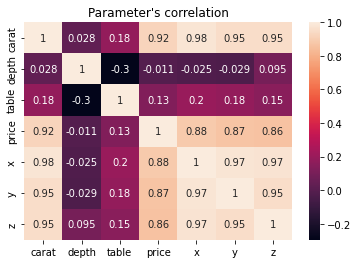

In [ ]:
sns.heatmap(data.corr(), annot=True)
plt.title("Parameter's correlation")
plt.show()

С целевой переменной price больше всего коррелируют признак carat и измерения xyz, их значения корреляции близки к 1

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
from copy import deepcopy

In [ ]:
X_raw = deepcopy(data)
y = X_raw['price']
X_raw = X_raw.drop('price', axis=1)

X_dum = pd.get_dummies(X_raw, drop_first=True)
print(f"Data shape: {X_dum.shape}")
X_dum.head()

Data shape: (53940, 23)


,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.3, random_state=np.random.seed(5))
X_train.head(2)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
33695,0.33,60.9,57.0,4.49,4.51,2.74,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
50064,0.56,61.2,57.0,5.31,5.35,3.26,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
normalizer = StandardScaler()
columns_for_normalization = ['carat', 'depth', 'table', 'x', 'y', 'z']

# X_train normalization
X_train_transformed = normalizer.fit_transform(X_train[columns_for_normalization])

# X_test normalization
X_test_transformed = normalizer.transform(X_test[columns_for_normalization])

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
lr = LinearRegression().fit(X_train_transformed, y_train)

for X_data, y_data, label in zip([X_train_transformed, X_test_transformed], [y_train, y_test], ['train', 'test']):
    print(f"MSE on {label} sample = {mean_squared_error(y_data, lr.predict(X_data)):.2f}", end='\t')
    print()

MSE on train sample = 2253461.22	
MSE on test sample = 2212150.09	


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
names = ["Parameter", "Without Regularization"]
info = []

for parameter, coef in zip(columns_for_normalization, np.abs(lr.coef_)):
    info.append([parameter, coef])

df_without_reg = pd.DataFrame(columns=names, data=info)
df_without_reg.set_index('Parameter').transpose()

Parameter,carat,depth,table,x,y,z
Without Regularization,5063.674115,303.662241,229.935565,1514.124267,31.674659,126.172135


Оценки коэффициентов для переменных "carat" и "x" на порядок отличаются от остальных переменных

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
print("Linear Regression")
print(f"Train: {mean_squared_error(y_train, lr.predict(X_train_transformed))}")
print(f"Test: {mean_squared_error(y_test, lr.predict(X_test_transformed))}")
print()

lasso = Lasso(10).fit(X_train_transformed, y_train)
print("Lasso")
print(f"Train: {mean_squared_error(y_train, lasso.predict(X_train_transformed))}")
print(f"Test: {mean_squared_error(y_test, lasso.predict(X_test_transformed))}")

ridge = Ridge(10).fit(X_train_transformed, y_train)
print("\nRidge")
print(f"Train: {mean_squared_error(y_train, ridge.predict(X_train_transformed))}")
print(f"Test: {mean_squared_error(y_test, ridge.predict(X_test_transformed))}")

Linear Regression
Train: 2253461.222062355
Test: 2212150.0898102825

Lasso
Train: 2263243.6730081826
Test: 2221777.121675018

Ridge
Train: 2253534.086919528
Test: 2211782.2563921236


In [ ]:
names = ["Lasso", "Ridge"]
info = []

for coef_lasso, coef_ridge in zip(np.abs(lasso.coef_), np.abs(ridge.coef_)):
    info.append([coef_lasso, coef_ridge])

df_with_reg = pd.DataFrame(data=info, columns=names)
df_without_reg.join(df_with_reg).set_index('Parameter').transpose()

Parameter,carat,depth,table,x,y,z
Without Regularization,5063.674115,303.662241,229.935565,1514.124267,31.674659,126.172135
Lasso,4628.225404,250.594380,215.329182,926.430921,0.000000,0.000000
Ridge,5027.760428,298.463168,229.792254,1451.904325,30.414802,100.268342


Веса для Lasso-регрессии уменьшились незначительно, на 8%, но все же разница значений коэффициентов ощутима более на Lasso-регресии, чем на Ridge-регрессии. Также произошло зануление таких коэффициентов как "y" и "z", так как они сильно зависят от друг друга и таких параметров как "carat" и "x".

На Ridge-регрессии веса почти не уменьшились.

Судя по данным о коэффицентах и метрике MSE на тестовой выборке проблема мультиколлинеарности **ярко** проявляется в изначальной регрессии. Даже после регуляризации порядки коэффициентов для параметров "carat" и "x" остаются высокими по сравнению с остальными, а значение MSE для Lasso-регресии даже повысилось на тестовой выборке, для Ridge-регрессии MSE слегка понизилась, но проблему мультиколлинеарности решить не удалось

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [ ]:
alpha_list = [0.1, 1, 10, 100, 200]
models = {'alpha': [], 'euclidean norm': [], 'kind': []}

for alpha in alpha_list:
    models['alpha'].append(alpha)
    models['euclidean norm'].append(np.linalg.norm(Lasso(alpha).fit(X_train_transformed, y_train).coef_))
    models['kind'].append('lasso')

    models['alpha'].append(alpha)
    models['euclidean norm'].append(np.linalg.norm(Ridge(alpha).fit(X_train_transformed, y_train).coef_))
    models['kind'].append('ridge')

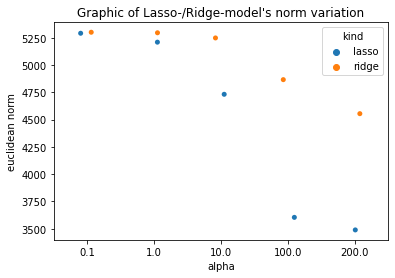

In [ ]:
sns.stripplot(data=pd.DataFrame(models), x='alpha', y='euclidean norm', hue='kind')

plt.title("Graphic of Lasso-/Ridge-model's norm variation")
plt.show()

По графику заметно, что Lasso-регрессия агрессивнее уменьшает веса модели (голубые точки по оси ординат значительно ниже оранжевых при увеличении α)

Lasso-регрессию часто используют для отбора признаков, потому что она позволяет избавляется от излишних коэффициентов, зануляя их, в том время как Ridge лишь только минимизирует их веса.

**Задача 3.11 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv = LassoCV(alphas=alpha_list, cv=5).fit(X_train_transformed, y_train)

# наибольшее качество - наименьшая ошибка
ind_min_MSE = np.argmin(np.mean(lasso_cv.mse_path_, axis=1))
print(f'Best value of alpha-parameter = {lasso_cv.alphas_[ind_min_MSE]}')

Best value of alpha-parameter = 1.0


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
best_lasso = Lasso(1).fit(X_train_transformed, y_train)

pd.DataFrame(data=[best_lasso.coef_], columns=columns_for_normalization)

,carat,depth,table,x,y,z
0,5021.5244,-284.867942,-229.017182,-1336.252049,20.048274,0.0


Совершенно неинформативным признаком оказался "z", малую информативность также имеет "y". Наибольший смысл в себе несут признаки "carat" и "x" (они оказывают самое сильное влияние на предсказание).

Исключение параметра "z" может быть связано с его сильной коррелируемостью с параметрами "y", "carat" и "x" (показано в таблице корреляций задания 3.3)

Высокая информативность признаков "carat" и "x" связана с ювелирной оценкой качества бриллиантов (именно, по каратам определяется ценность камня и , видимо, чем длинне камень, тем меньше его стоимость)

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
mse_regression = 2212150.09
mse_best_lasso = mean_squared_error(best_lasso.predict(X_test_transformed), y_test)

print(f"MSE of Linear Regresion task 3.7 \t= {mse_regression}")
print(f"MSE of Lasso alpha(1.0) \t\t= {mse_best_lasso:.2f}")

MSE of Linear Regresion task 3.7 	= 2212150.09
MSE of Lasso alpha(1.0) 		= 2211000.71


Ошибка на тестовой выборке Lasso-регрессии с параметром α = 1 оказалась меньше, то есть лучше, чем ошибка обычной линейной регрессии на той же выборке. Отсюда можно сделать вывод, что лучше использовать Lasso-регрессию с параметром α = 1, так как об эффективности модели мы судим по предсказаниям на тестовой выборке.

Модель с регуляризацией лучше, так как в нее встроен штраф на коэффициенты при ошибке в предсказании, что дает нам возможность регулировать обучение модели и избегать проблемы переобучения.

**НО!** Стоит отметить, что в рамках конкретной задачи разница в результатах вычисления функционала ошибки невелика даже при применении регуляризации и занулении неинформативных признаков. Скорее всего это связано с особеностями набора данных и в данной задаче требуется применение более хитрых подходов построения моделей для получения явных отличий.